In [15]:
import (
    "math/rand"

    "image"

    "gonum.org/v1/plot"
    "gonum.org/v1/plot/plotter"
    "gonum.org/v1/plot/plotutil"
    "gonum.org/v1/plot/vg"
    "gonum.org/v1/plot/vg/draw"
    "gonum.org/v1/plot/vg/vgimg"

)

In [16]:
// randomPoints returns some random x, y points.
func randomPoints(n int) plotter.XYs {
    pts := make(plotter.XYs, n)
    for i := range pts {
        if i == 0 {
            pts[i].X = rand.Float64()
            pts[i].Y = rand.Float64()
        } else {
            pts[i].X = pts[i-1].X + rand.Float64()
            if i == 1 {
                pts[i].Y = pts[i - 1].Y 
            } else {
                pts[i].Y = pts[i - 2].Y * 0.3 + pts[i - 1].Y * 0.7
            }
            pts[i].Y += 0.5 * (rand.Float64() - 0.5)
        }
    }
    return pts
}

In [17]:
p, err := plot.New()

In [18]:
p.Title.Text = "Plotutil example"
p.X.Label.Text = "X"
p.Y.Label.Text = "Y"

In [19]:
err = plotutil.AddLinePoints(p,
    "First", randomPoints(15),
    "Second", randomPoints(15),
    "Third", randomPoints(15))


In [20]:
const dpi = 120

img := image.NewRGBA(image.Rect(0, 0, 6*dpi, 3*dpi))
c := vgimg.NewWith(vgimg.UseImage(img))
p.Draw(draw.New(c))

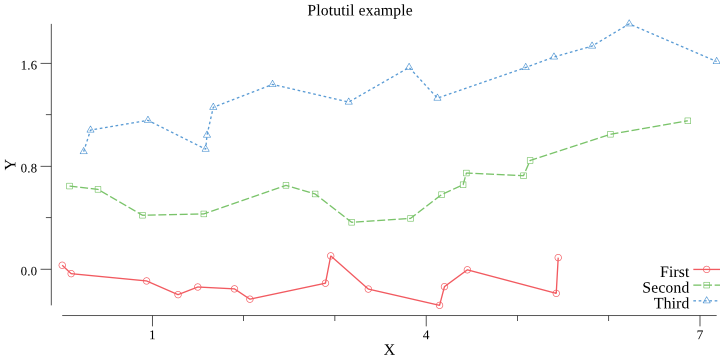

In [21]:
display.Image(img)